# Importing Libraries 

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading Data from Excel Sheet

In [166]:
df = pd.read_excel('Neural Networks In Action.xlsx', sheet_name='Sheet1')
df.head()

,Neural Networks using Gradient Decent (XNOR Problem),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,i1,i2,w11,w12,w21,w22,h1,h2,wh1,wh2,o,t,Eo,Eh1,Eh2
2,0,0,1.110624,1.110324,1.23779,1.110324,0.5,0.5,1.204297,1.203004,0.769173,1,0.230827,0.115475,0.115351
3,0,1,1.110624,1.110324,1.23779,1.110324,0.775179,0.752189,1.204297,1.203004,0.862763,0,-0.862763,-0.431613,-0.43115
4,1,0,1.110624,1.110324,1.23779,1.110324,0.752245,0.752189,1.204297,1.203004,0.85946,0,-0.85946,-0.429961,-0.429499


# Selecting Input and Output Features

In [167]:
X = df.iloc[2:6, 0:2].values
Y = df.iloc[2:6, 11].values

# make X and Y as float
X = X.astype(float)
Y = Y.astype(float)

# Transpose X and Y
X = X.T

# Reshape Y
Y = Y.reshape(1, Y.shape[0])


# Sigmoid Function

In [168]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Initializing Weights and Bais

In [169]:
def initializeParameters(inputFeatures, neuronsInHiddenLayer, outputFeatures):
    W1 = np.random.randn(neuronsInHiddenLayer, inputFeatures)
    W2 = np.random.randn(outputFeatures, neuronsInHiddenLayer)
    b1 = np.zeros((neuronsInHiddenLayer, 1))
    b2 = np.zeros((outputFeatures, 1))
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters

# Forward Propagation

In [170]:
def forwardPropagation(X, Y, parameters):
    W1 = parameters['W1']
    W2 = parameters['W2']
    b1 = parameters['b1']
    b2 = parameters['b2']

    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    m = X.shape[1]

    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)

    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = - np.sum(logprobs) / m
    return cost, cache, A2

# Backward Propagation

In [171]:
def backwardPropagation(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2) = cache

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1,A1*(1-A1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    grads = {"dZ2": dZ2, "dW2": dW2, "db2": db2,
            "dZ1": dZ1, "dW1": dW1, "db1": db1}
            
    return grads

# Updating Weights

In [172]:
def updateParameters(parameters, gradients, learningRate):
    parameters['W1'] = parameters['W1'] - learningRate * gradients['dW1']
    parameters['b1'] = parameters['b1'] - learningRate * gradients['db1']
    parameters['W2'] = parameters['W2'] - learningRate * gradients['dW2']
    parameters['b2'] = parameters['b2'] - learningRate * gradients['db2']
    return parameters

# Defining Variables for Neural Networks

In [173]:
neuronsInHiddenLayer = 2
inputFeatures = X.shape[0]
outputFeatures = Y.shape[0]

param = initializeParameters(inputFeatures, neuronsInHiddenLayer, outputFeatures)

epochs = 100000
learningRate = 0.01
losses = np.zeros((epochs, 1))

In [174]:
for i in range(epochs):
    losses[i, 0], cache, A2 = forwardPropagation(X, Y, param)
    grads = backwardPropagation(X, Y, cache)
    param = updateParameters(param, grads, learningRate)  

# Visualizing the Data 

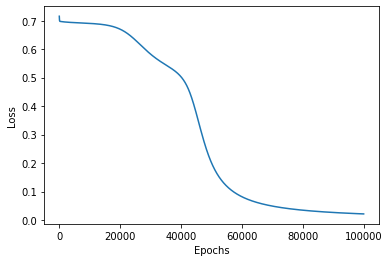

In [175]:
plt.figure()
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Testing Phase

In [176]:
X = np.array([[1, 1, 0, 0], [0, 1, 0, 1]])

cost, _, A2 = forwardPropagation(X, Y, param)
print('Cost: ', cost)

Cost:  3.8583635362958106


In [177]:
prediction = (A2 > 0.5)* 1.0
print('Prediction: ', prediction)

Prediction:  [[0. 1. 1. 0.]]


In [178]:
# create dataframe
df1 = pd.DataFrame({'X1': X[0, :], 'X2': X[1, :],'Y': Y[0, :], 'Prediction': prediction[0, :]})
df1

,X1,X2,Y,Prediction
0,1,0,1.0,0.0
1,1,1,0.0,1.0
2,0,0,0.0,1.0
3,0,1,1.0,0.0
